* 画电路图用什么软件比较方便？ - 知乎  https://www.zhihu.com/question/20256043
* https://schemdraw.readthedocs.io/en/latest/index.html
* python 电路绘制库 schemdraw_viswang的博客-CSDN博客_python画电路图  https://blog.csdn.net/viswang/article/details/80659460

In [23]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# import matplotlib.pyplot as plt
# import svgelements as svg

import matplotlib
matplotlib.rcParams['svg.fonttype'] = 'none'

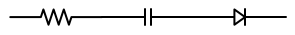

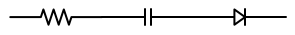

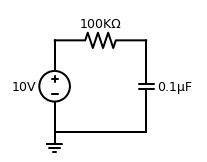

In [24]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    d.add(elm.Resistor())
    d.add(elm.Capacitor())
    d.add(elm.Diode())

with schemdraw.Drawing() as d:
    d += elm.Resistor()
    d += elm.Capacitor()
    d += elm.Diode()

with schemdraw.Drawing() as d:
    d += elm.Resistor().label('100KΩ')
    d += elm.Capacitor().down().label('0.1μF', loc='bottom')
    d += elm.Line().left()
    d += elm.Ground()
    d += elm.SourceV().up().label('10V')

# if __name__ == '__main__': # 【这种调用方式，为什么没有输出？但不用 main 可调用】
#     d = schemdraw.Drawing()
#     d += elm.Resistor().label('100KΩ')
#     d += elm.Capacitor().down().label('0.1μF', loc='bottom')
#     d += elm.Line().left()
#     d += elm.Ground()
#     d += elm.SourceV().up().label('10V')
#     d.draw()

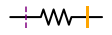

In [25]:
d = schemdraw.Drawing()
d.add(elm.Resistor())
schemfig = d.draw()
schemfig.ax.axvline(.5, color='purple', ls='--')
schemfig.ax.axvline(2.5, color='orange', ls='-', lw=3);
display(schemfig)

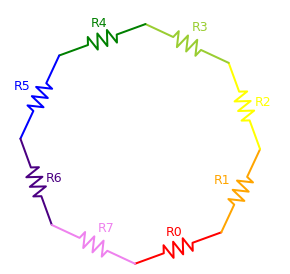

In [26]:
with schemdraw.Drawing() as d:
    for i, color in enumerate(['red', 'orange', 'yellow', 'yellowgreen', 'green', 'blue', 'indigo', 'violet']):
        d += elm.Resistor().theta(45*i+20).color(color).label('R{}'.format(i))

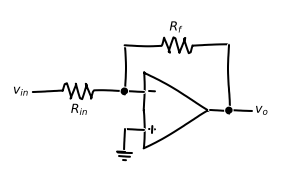

In [27]:
import matplotlib.pyplot as plt
plt.xkcd()

with schemdraw.Drawing() as d:
    d += (op := elm.Opamp(leads=True))
    d += elm.Line().down().at(op.in2).length(d.unit/4)
    d += elm.Ground(lead=False)
    d += (Rin := elm.Resistor().at(op.in1).left().idot().label('$R_{in}$', loc='bot').label('$v_{in}$', loc='left'))
    d += elm.Line().up().at(op.in1).length(d.unit/2)
    d += elm.Resistor().tox(op.out).label('$R_f$')
    d += elm.Line().toy(op.out).dot()
    d += elm.Line().right().at(op.out).length(d.unit/4).label('$v_{o}$', loc='right')

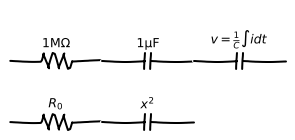

In [50]:
# Labels
d = schemdraw.Drawing()
d += elm.Resistor().label('1MΩ')
d += elm.Capacitor().label('1μF')
d += elm.Capacitor().label(r'$v = \frac{1}{C} \int i dt$')
d += elm.Resistor().at((0, -2)).label('$R_0$')
d += elm.Capacitor().label('$x^2$')
d.draw()

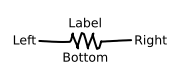

In [47]:
# Location
d = schemdraw.Drawing()
d += (elm.Resistor()
        .label('Label')  # 'top' is default
        .label('Bottom', loc='bottom')
        .label('Right', loc='right')
        .label('Left', loc='left'))
d.draw()

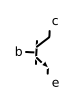

In [48]:
d = schemdraw.Drawing()
d += (elm.BjtNpn()
        .label('b', loc='base')
        .label('c', loc='collector')
        .label('e', loc='emitter'))
d.draw()

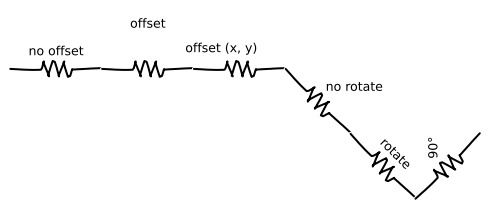

In [49]:
d = schemdraw.Drawing()
d += elm.Resistor().label('no offset')
d += elm.Resistor().label('offset', ofst=1)
d += elm.Resistor().label('offset (x, y)', ofst=(-.6, .2))
d += elm.Resistor().theta(-45).label('no rotate')
d += elm.Resistor().theta(-45).label('rotate', rotate=True)
d += elm.Resistor().theta(45).label('90°', rotate=90)
d.draw()

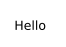

In [42]:
elm.Label().label('Hello')

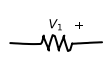

In [45]:
# Voltage Labels
d = schemdraw.Drawing()
d += elm.Resistor().label(('–','$V_1$','+'))  # Note: using endash U+2013 character
d.draw()

In [53]:
d = schemdraw.Drawing()
d += elm.Line().dot(open=True)
d += elm.Gap().label(('–','$V_o$','+'))
d += elm.Line().idot(open=True)
d.draw()

AttributeError: module 'schemdraw' has no attribute 'backendsDrawing'